## Exercise 6.5 - Unsupervised Machine Learning

### Contents

#### 1. Install and import all necessary libraries in your Jupyter notebook

#### 2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming)

#### 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise

#### 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart

#### 5. Run the k-means algorithm

#### 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters

#### 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters

#### 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further

#### 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings

#### 10. Propose what these results could be useful for in future steps of an analytics pipeline

### 1. Install and import all necessary libraries in your Jupyter notebook.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl
import plotly.express as px

In [2]:
#Ensure graphs are displayed in notebook
%matplotlib inline

### 2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).

In [3]:
#Define path
path = r'/Users/anfran/Desktop/Chocolate Rating Project'

In [4]:
#Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'chocolate_data_clean.csv'), index_col = False)

In [6]:
df.shape

(1795, 10)

In [7]:
df.head()

,Row ID,Company,bean_origin,REF,review_date,cocoa_percent,company_location,Rating,bean_type,broad_bean_origin
0,1177,Neuhaus (Callebaut),Sao Tome,15,2006,0.75,Belgium,2.75,Forastero,Sao Tome
1,1292,Pierre Marcolini,"Porcelana, Tabasco, Limited Ed.",81,2006,0.72,Belgium,4.00,Criollo,Mexico
2,1237,Original Hawaiin Chocolate Factory,"Hawai'i, Kona Estate Grown",24,2006,0.60,United States,3.00,Unknown,Hawaii
3,1178,Neuhaus (Callebaut),Ocumare,24,2006,0.71,Belgium,3.00,Criollo,Venezuela
4,1176,Neuhaus (Callebaut),West Africa,15,2006,0.73,Belgium,2.00,Forastero,West Africa


In [8]:
#Drop all categorical columns 
df.drop(['Company', 'bean_origin', 'company_location', 'bean_type', 'broad_bean_origin'], axis=1, inplace=True)

In [9]:
df.head()

,Row ID,REF,review_date,cocoa_percent,Rating
0,1177,15,2006,0.75,2.75
1,1292,81,2006,0.72,4.00
2,1237,24,2006,0.60,3.00
3,1178,24,2006,0.71,3.00
4,1176,15,2006,0.73,2.00


In [10]:
#Check for null values
df.isnull().sum()

Row ID           0
REF              0
review_date      0
cocoa_percent    0
Rating           0
dtype: int64

No null values found

### 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [11]:
#Use standard scaler to standardize data in the dataframe
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

In [12]:
#Fit standardized data using PCA
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [13]:
#Show how much variance is explained by each of the four components
pca.explained_variance_ratio_

array([0.40142507, 0.23373463, 0.19821454, 0.16364157, 0.00298419])

In [14]:
#Defines the range of potential clusters in the data
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [15]:
#Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

[-1030372777.8861939,
 -622152877.3256998,
 -388076400.4389948,
 -258843263.89308918,
 -213705729.27898222,
 -175609731.05222034,
 -149266600.63174534,
 -125842687.3428213,
 -109753621.51814431]

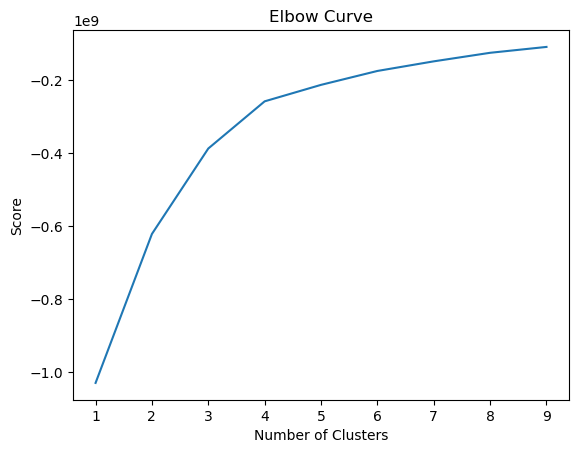

In [16]:
#Plot the elbow curve 
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

The curve straightens out beginning at five. This means that the optimal count for clusters is five.

### 5. Run the k-means algorithm.

In [18]:
#Create the k-means object
kmeans = KMeans(n_clusters = 5)

In [20]:
#Fit the k-means object to the data
kmeans.fit(df)

KMeans(n_clusters=5)

### 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [21]:
df['clusters'] = kmeans.fit_predict(df)

In [22]:
df.head()

,Row ID,REF,review_date,cocoa_percent,Rating,clusters
0,1177,15,2006,0.75,2.75,0
1,1292,81,2006,0.72,4.00,0
2,1237,24,2006,0.60,3.00,0
3,1178,24,2006,0.71,3.00,0
4,1176,15,2006,0.73,2.00,0


In [23]:
df['clusters'].value_counts()

2    413
1    385
3    355
0    342
4    300
Name: clusters, dtype: int64

### 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

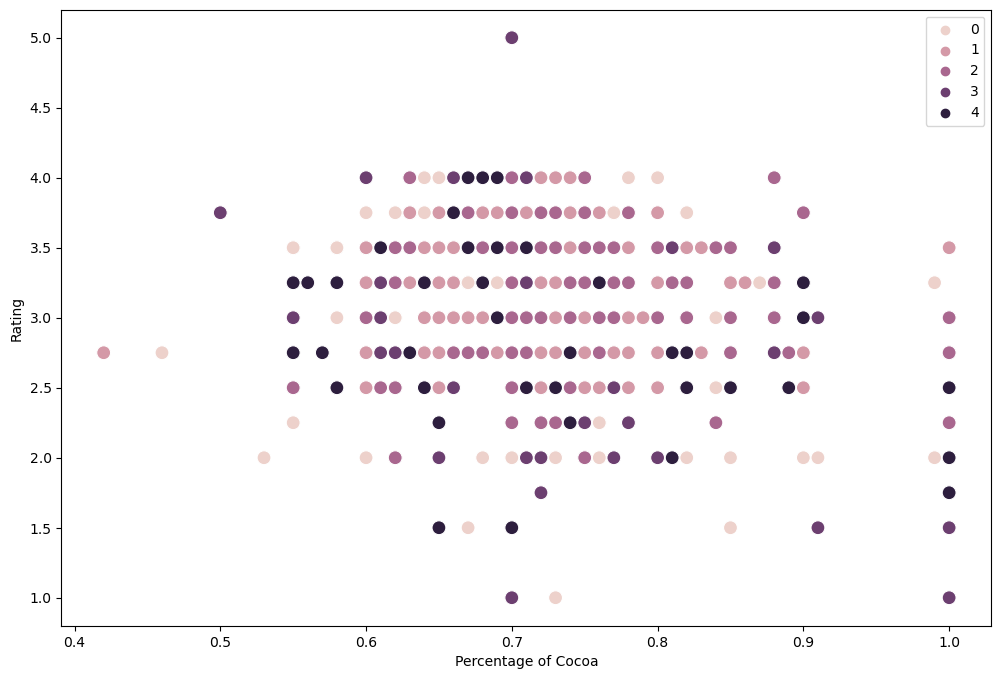

In [24]:
# Plot the clusters for the 'cocoa_percent' and 'Rating' 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['cocoa_percent'], y=df['Rating'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Percentage of Cocoa') 
plt.ylabel('Rating') 
plt.show()

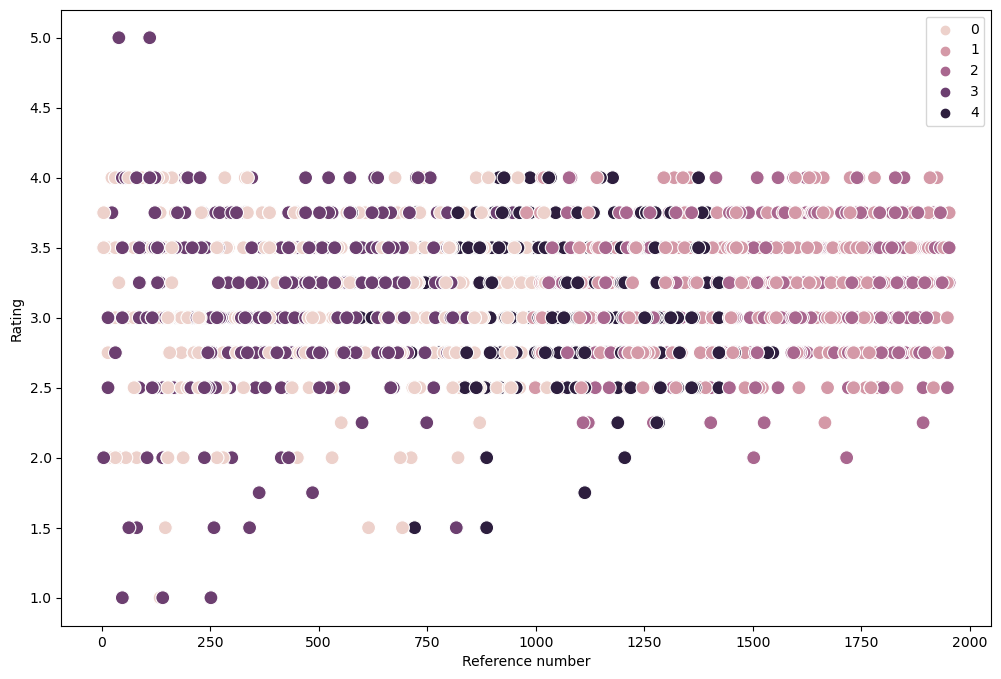

In [25]:
# Plot the clusters for the 'REF' and 'Rating' 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['REF'], y=df['Rating'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Reference number') 
plt.ylabel('Rating') 
plt.show()

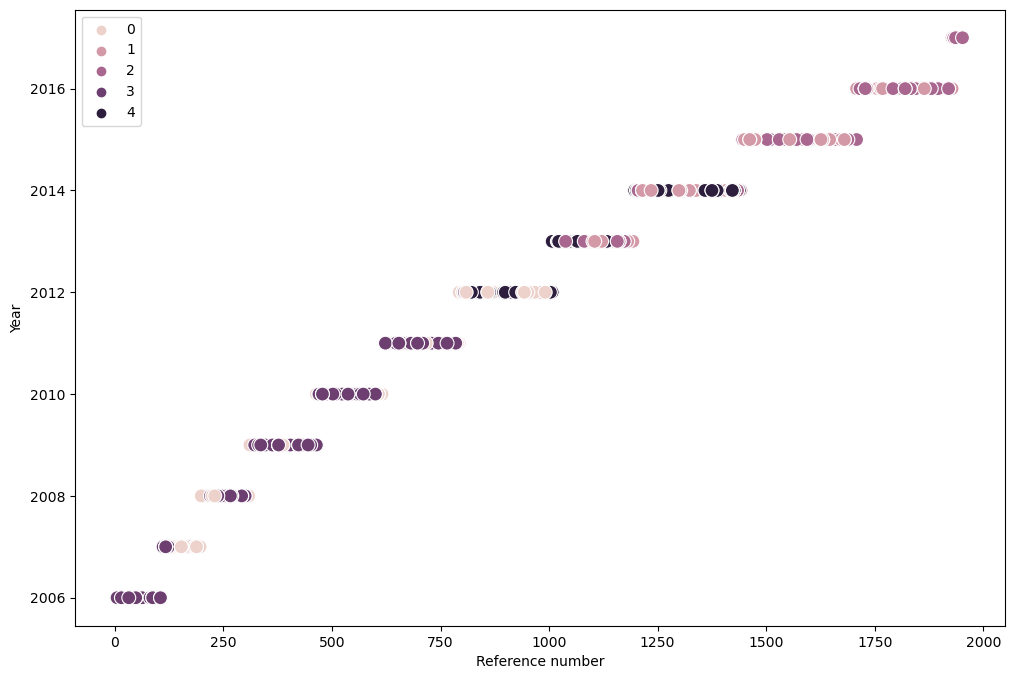

In [26]:
# Plot the clusters for the 'REF' and 'review_date' 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['REF'], y=df['review_date'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Reference number') 
plt.ylabel('Year') 
plt.show()

### 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

I'm not seeing how the clusters make sense in the first two scatterplots, meaning that there is not a correlation between 'Rating' and either 'cocoa_percent' or the 'REF.' These results were also achieved in the previous exercise. It seems to me that connections in this dataset will need to be made between categorical and numeric variables. 

### 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [28]:
df.loc[df['clusters'] == 4, 'cluster'] = 'black'
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'gray'

In [29]:
df.groupby('cluster').agg({'cocoa_percent':['mean', 'median'], 
                         'Rating':['mean', 'median'], 
                         'REF':['mean', 'median'],
                          'review_date':['mean', 'median']})

cocoa_percent           Rating                 REF          \
                     mean median      mean median         mean  median   
cluster                                                                  
black            0.717800    0.7  3.171667   3.25  1054.083333  1047.5   
dark purple      0.712958    0.7  3.133803   3.00   407.909859   404.0   
gray             0.714094    0.7  3.138158   3.00   511.111111   534.0   
pink             0.715455    0.7  3.231169   3.25  1531.090909  1550.0   
purple           0.723753    0.7  3.238499   3.25  1535.462470  1558.0   

             review_date          
                    mean  median  
cluster                           
black        2012.736667  2013.0  
dark purple  2009.022535  2009.0  
gray         2009.538012  2010.0  
pink         2014.810390  2015.0  
purple       2014.857143  2015.0

In [31]:
df['cluster'].value_counts()

purple         413
pink           385
dark purple    355
gray           342
black          300
Name: cluster, dtype: int64

### 10. Propose what these results could be useful for in future steps of an analytics pipeline.

#### 1. The black cluster has the best stats in almost all categories.

#### 2. As noted in the last exercise, 'cocoa_percent' and 'Rating' do not have a correlation. The hightest rated cluster has a lower percent and rating, while the purple cluster has a higher mean cocoa percent and rating. 

#### 3. There is also not a clear relationship between the 'REF,' or when the ratings were recorded and the other numerical variables. 

#### As noted above, categorical variables will need to be considered to identify what may contribute to  each specific chocolate's rating. 